#### Create models and check architectures and weights

In [ ]:
# load keras layers and model modules
from tensorflow.keras.layers import Input, Dense, SimpleRNN, LSTM, GRU, Bidirectional
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K

In [ ]:
def get_trainable_parameters(model):
  # this quickly gets weights for each layer
  number_of_weights = [K.count_params(w) for w in model.trainable_weights]
  # loop all layers for more details
  k = 0
  for layer in model.layers:
    print('_ _ _ '*10)
    print(layer.name)
    for weights in layer.trainable_weights:
      print(f'{weights.name}, \nshape={weights.shape} ===> {number_of_weights[k]}')
      k+=1
  print('_ _ _ '*10)
  total = np.array(number_of_weights).sum().astype(int)
  print(f'Total = {total}')
  return total
  

In [ ]:
# Define number of input variables D, lenght of sequences L (not really important for this notebook) and number of neurons H

D = 4 # number of input
L = 7 # sequence length
H = 5 # number of neurons

# we store here the total number of weights
import pandas as pd
import numpy as np
totals = pd.Series(index=['SimpleRNN','LSTM','GRU','BiSimpleRNN','deepSimpleRNN'], dtype=np.int64)

In [ ]:
# SimpleRNN model
i = Input(shape=(L,D), name='input_layer')
x = SimpleRNN(H, name='recurrent_layer',return_sequences=False)(i)
x = Dense(1, name='output_layer')(x)
RNN = Model(i,x, name='SimpleRNN')

totals.loc[RNN.name] = get_trainable_parameters(RNN)

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
input_layer
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
recurrent_layer
recurrent_layer/simple_rnn_cell/kernel:0, 
shape=(4, 5) ===> 20
recurrent_layer/simple_rnn_cell/recurrent_kernel:0, 
shape=(5, 5) ===> 25
recurrent_layer/simple_rnn_cell/bias:0, 
shape=(5,) ===> 5
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
output_layer
output_layer/kernel:0, 
shape=(5, 1) ===> 5
output_layer/bias:0, 
shape=(1,) ===> 1
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Total = 56


In [ ]:
# LSTM model
i = Input(shape=(L,D), name='input_layer')
x = LSTM(H, name='recurrent_layer',return_sequences=False)(i)
x = Dense(1, name='output_layer')(x)
RNN = Model(i,x, name='LSTM')

totals.loc[RNN.name] = get_trainable_parameters(RNN)

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
input_layer
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
recurrent_layer
recurrent_layer/lstm_cell/kernel:0, 
shape=(4, 20) ===> 80
recurrent_layer/lstm_cell/recurrent_kernel:0, 
shape=(5, 20) ===> 100
recurrent_layer/lstm_cell/bias:0, 
shape=(20,) ===> 20
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
output_layer
output_layer/kernel:0, 
shape=(5, 1) ===> 5
output_layer/bias:0, 
shape=(1,) ===> 1
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Total = 206


In [ ]:
# GRU model
i = Input(shape=(L,D), name='input_layer')
x = GRU(H, name='recurrent_layer',return_sequences=False, reset_after=False)(i)
x = Dense(1, name='output_layer')(x)
RNN = Model(i,x, name='GRU',)

totals.loc[RNN.name] = get_trainable_parameters(RNN)

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
input_layer
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
recurrent_layer
recurrent_layer/gru_cell/kernel:0, 
shape=(4, 15) ===> 60
recurrent_layer/gru_cell/recurrent_kernel:0, 
shape=(5, 15) ===> 75
recurrent_layer/gru_cell/bias:0, 
shape=(15,) ===> 15
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
output_layer
output_layer/kernel:0, 
shape=(5, 1) ===> 5
output_layer/bias:0, 
shape=(1,) ===> 1
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Total = 156


In [ ]:
# Bidirectional SimpleRNN
i = Input(shape=(L,D), name='input_layer')
x = Bidirectional(SimpleRNN(H, name='recurrent_layer',return_sequences=False))(i)
x = Dense(1, name='output_layer')(x)
RNN = Model(i,x, name='BiSimpleRNN')

totals.loc[RNN.name] = get_trainable_parameters(RNN)

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
input_layer
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
bidirectional
bidirectional/forward_recurrent_layer/simple_rnn_cell_2/kernel:0, 
shape=(4, 5) ===> 20
bidirectional/forward_recurrent_layer/simple_rnn_cell_2/recurrent_kernel:0, 
shape=(5, 5) ===> 25
bidirectional/forward_recurrent_layer/simple_rnn_cell_2/bias:0, 
shape=(5,) ===> 5
bidirectional/backward_recurrent_layer/simple_rnn_cell_3/kernel:0, 
shape=(4, 5) ===> 20
bidirectional/backward_recurrent_layer/simple_rnn_cell_3/recurrent_kernel:0, 
shape=(5, 5) ===> 25
bidirectional/backward_recurrent_layer/simple_rnn_cell_3/bias:0, 
shape=(5,) ===> 5
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
output_layer
output_layer/kernel:0, 
shape=(10, 1) ===> 10
output_layer/bias:0, 
shape=(1,) ===> 1
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Total = 111


In [ ]:
# Deep SimpleRNN
i = Input(shape=(L,D), name='input_layer')
x = SimpleRNN(H, name='recurrent_layer_1',return_sequences=True)(i)
x = SimpleRNN(H, name='recurrent_layer_2',return_sequences=False)(x)
x = Dense(1, name='output_layer')(x)
RNN = Model(i,x, name='deepSimpleRNN')

totals.loc[RNN.name] = get_trainable_parameters(RNN)

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
input_layer
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
recurrent_layer_1
recurrent_layer_1/simple_rnn_cell_4/kernel:0, 
shape=(4, 5) ===> 20
recurrent_layer_1/simple_rnn_cell_4/recurrent_kernel:0, 
shape=(5, 5) ===> 25
recurrent_layer_1/simple_rnn_cell_4/bias:0, 
shape=(5,) ===> 5
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
recurrent_layer_2
recurrent_layer_2/simple_rnn_cell_5/kernel:0, 
shape=(5, 5) ===> 25
recurrent_layer_2/simple_rnn_cell_5/recurrent_kernel:0, 
shape=(5, 5) ===> 25
recurrent_layer_2/simple_rnn_cell_5/bias:0, 
shape=(5,) ===> 5
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
output_layer
output_layer/kernel:0, 
shape=(5, 1) ===> 5
output_layer/bias:0, 
shape=(1,) ===> 1
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Total = 111


#### Compare 

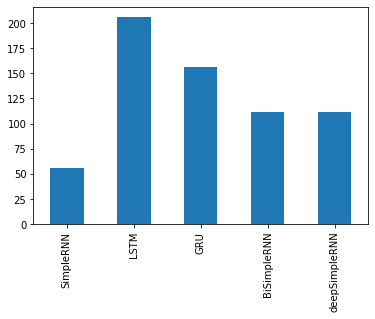

In [ ]:
totals.plot(kind='bar')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8086d0d4-4bcd-4dff-b47c-0b35edb81aeb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>